In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.mllib.fpm import FPGrowth
import re
from random import random
from pyspark import SparkContext

In [2]:
import os
config = pyspark.SparkConf().set('spark.executor.memory', '2GB')\
         .set('spark.cores.max', '2')\
         .set('spark.port.maxRetries','200')\
         .set('spark.ui.port', 4040 + hash(os.getcwd().split("/")[2])%200 )    
sc = pyspark.SparkContext(appName="Professional", master='spark://polyp1:7077',conf = config )

ss = pyspark.sql.SparkSession.builder.config(conf = config).getOrCreate()

In [3]:
#### Input data
sc = ss.sparkContext
taxiRDD = sc.textFile("/scratch/ISE495/taxi_data/green_tripdata_2015-09.csv")


In [11]:
! head /scratch/ISE495/taxi_data/green_tripdata_2015-09.csv

In [7]:
print taxiRDD.take(1)
print taxiRDD.count()

[u'2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979484558105469,40.684955596923828,-73.97943115234375,40.685020446777344,1,.00,7.8,0,0,1.95,0,,0,9.75,1,2']
1494926


In [10]:
taxiC = taxiRDD.map(lambda s: s.split(","))
print taxiC.take(1)

city1 = taxiC.take(1000)

def city(s):
    cit = []
    word = s.split(",")
    if (1.323942*word[5] + 138.669195) > word[6]:
        word[5] = 'NJ'
    else:
        word[5] = 'NY'
    if (1.323942*word[7] + 138.669195) > word[8]:
        word[7] = 'NJ'
    else:
        word[7] = 'NY'
        
    return word

  

print taxiC.map(city).take(1)


[[u'2', u'2015-09-01 00:02:34', u'2015-09-01 00:02:38', u'N', u'5', u'-73.979484558105469', u'40.684955596923828', u'-73.97943115234375', u'40.685020446777344', u'1', u'.00', u'7.8', u'0', u'0', u'1.95', u'0', u'', u'0', u'9.75', u'1', u'2']]


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 10.0 failed 4 times, most recent failure: Lost task 0.3 in stage 10.0 (TID 26, 10.0.0.30, executor 0): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark-2.2.0-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 177, in main
    process()
  File "/opt/spark-2.2.0-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 172, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/spark-2.2.0-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/serializers.py", line 268, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/spark-2.2.0-bin-hadoop2.7/python/pyspark/rdd.py", line 1339, in takeUpToNumLeft
    yield next(iterator)
  File "<ipython-input-10-bde8913ab554>", line 8, in city
AttributeError: 'list' object has no attribute 'split'

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:108)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:335)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1499)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1487)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1486)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1486)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:814)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:814)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:814)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1714)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1669)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1658)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:630)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2022)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2043)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2062)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:446)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark-2.2.0-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 177, in main
    process()
  File "/opt/spark-2.2.0-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 172, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/spark-2.2.0-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/serializers.py", line 268, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/spark-2.2.0-bin-hadoop2.7/python/pyspark/rdd.py", line 1339, in takeUpToNumLeft
    yield next(iterator)
  File "<ipython-input-10-bde8913ab554>", line 8, in city
AttributeError: 'list' object has no attribute 'split'

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:108)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:335)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [4]:
from pyspark.sql import Row
taxiC = taxiRDD.map(lambda s: s.split(","))

taxiDF = taxiC.toDF(["VendorID","lpep_pickup_datetime","Lpep_dropoff_datetime","Store_and_fwd_flag","RateCodeID","Pickup_longitude","Pickup_latitude","Dropoff_longitude","Dropoff_latitude","Passenger_count","Trip_distance","Fare_amount","Extra","MTA_tax","Tip_amount","Tolls_amount","Ehail_fee","improvement_surcharge","Total_amount","Payment_type","Trip_type"])



In [21]:
print taxiDF.show()

Py4JJavaError: An error occurred while calling o167.showString.
: java.lang.IllegalStateException: SparkContext has been shutdown
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2014)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2043)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2062)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:336)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collectFromPlan(Dataset.scala:2853)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2153)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2153)
	at org.apache.spark.sql.Dataset$$anonfun$55.apply(Dataset.scala:2837)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:2836)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2153)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2366)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:245)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)


In [41]:
from pyspark.sql.functions import unix_timestamp
from pyspark.sql.functions import hour
taxiDF.createOrReplaceTempView("part")
#ss.sql("SELECT *, IF(1.323942*FLOAT(part.Pickup_longitude) + 138.669195 < FLOAT(part.Pickup_latitude),'NJ','NY') as pickup_state, IF(1.323942*FLOAT(part.Dropoff_longitude) + 138.669195 < FLOAT(part.Dropoff_latitude),'NJ','NY') as dropOff_state FROM part").show()
taxi2DF=ss.sql("SELECT *, CONCAT(pickup_state,dropOff_state) as direction FROM (SELECT *, IF(1.323942*FLOAT(part.Pickup_longitude) + 138.669195 < FLOAT(part.Pickup_latitude),'NJ','NY') as pickup_state, IF(1.323942*FLOAT(part.Dropoff_longitude) + 138.669195 < FLOAT(part.Dropoff_latitude),'NJ','NY') as dropOff_state, unix_timestamp('Lpep_dropoff_datetime')-unix_timestamp('lpep_pickup_datetime') as duration FROM part)")
taxi2DF=taxi2DF.withColumn("duration", unix_timestamp('Lpep_dropoff_datetime')-unix_timestamp("lpep_pickup_datetime"))
#taxi2DF=taxi2DF.withColumn('Lpep_dropoff_datetime', to_timestamp('Lpep_dropoff_datetime'))
taxi2DF=taxi2DF.withColumn('pickupH', hour('lpep_pickup_datetime'))
taxi2DF=taxi2DF.withColumn('dropOffH', hour('Lpep_dropoff_datetime'))


#taxi2DF.createOrReplaceTempView("2DF")
#SQRT(POWER(FLOAT(part.Pickup_longitude)-FLOAT(part.Dropoff_longitude),2)+POWER(FLOAT(part.Pickup_latitude)-FLOAT(part.Dropoff_latitude),2)) as distance



In [37]:
y=40.912216186523438
x=-74.010795593261719
z=1.323942*x + 138.669195
x2=-74.010780334472656
y2=40.912212371826172
z2=1.323942*x2 + 138.669195
print(y,1.323942*x + 138.669195)
if(y>z):
    print 'NJ'
else:
    print 'NY'
if(y2>z2):
    print 'NJ'
else:
    print 'NY'
    
    

(40.91221618652344, 40.6831942606659)
NJ
NJ


In [18]:
sc.stop()
ss.stop()


In [7]:
taxi2DF.groupBy("direction").count().show()


+---------+------+
|direction| count|
+---------+------+
|     NYNJ|144110|
|     NYNY|864553|
|     NJNJ|449130|
|     NJNY| 37133|
+---------+------+



In [18]:
taxi2DF.groupby('direction').agg({'Passenger_count': "mean", 'Total_amount': "mean", "Trip_distance": "mean", "duration": "mean"}).show()

+---------+------------------+------------------+------------------+--------------------+
|direction|avg(Trip_distance)|     avg(duration)| avg(Total_amount)|avg(Passenger_count)|
+---------+------------------+------------------+------------------+--------------------+
|     NYNJ|5.7844378599681034|1919.3525431961696|26.448231142874565|  1.4269516341683437|
|     NYNY|2.6425410009565615|1167.9226293818888|13.735468282473768|  1.4071202112536767|
|     NJNJ| 2.301217665263959|1032.1186449357647|12.605316634389286|  1.2877830472246343|
|     NJNY|  7.68569601163386|1820.0406107774756|30.270238332479877|   1.303207389653408|
+---------+------------------+------------------+------------------+--------------------+



In [37]:
from pyspark.sql.functions import to_timestamp

taxi2DF.show()

+--------+--------------------+---------------------+------------------+----------+-------------------+------------------+-------------------+------------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------------+-------------+--------+---------+-------+--------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|   Pickup_longitude|   Pickup_latitude|  Dropoff_longitude|  Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|pickup_state|dropOff_state|duration|direction|pickupH|dropOffH|
+--------+--------------------+---------------------+------------------+----------+-------------------+------------------+-------------------+------------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---

In [42]:
taxi3DF.createOrReplaceTempView("2DF")


AnalysisException: u"expression '2df.`pickupH`' is neither present in the group by, nor is it an aggregate function. Add to group by or wrap in first() (or first_value) if you don't care which value you get.;;\nAggregate [direction#1376], [direction#1376, pickupH#1430, count(pickupH#1430) AS count(pickupH)#1489L]\n+- SubqueryAlias 2df\n   +- Project [VendorID#0, lpep_pickup_datetime#1, Lpep_dropoff_datetime#2, Store_and_fwd_flag#3, RateCodeID#4, Pickup_longitude#5, Pickup_latitude#6, Dropoff_longitude#7, Dropoff_latitude#8, Passenger_count#9, Trip_distance#10, Fare_amount#11, Extra#12, MTA_tax#13, Tip_amount#14, Tolls_amount#15, Ehail_fee#16, improvement_surcharge#17, Total_amount#18, Payment_type#19, Trip_type#20, pickup_state#1373, dropOff_state#1374, duration#1403L, ... 3 more fields]\n      +- Project [VendorID#0, lpep_pickup_datetime#1, Lpep_dropoff_datetime#2, Store_and_fwd_flag#3, RateCodeID#4, Pickup_longitude#5, Pickup_latitude#6, Dropoff_longitude#7, Dropoff_latitude#8, Passenger_count#9, Trip_distance#10, Fare_amount#11, Extra#12, MTA_tax#13, Tip_amount#14, Tolls_amount#15, Ehail_fee#16, improvement_surcharge#17, Total_amount#18, Payment_type#19, Trip_type#20, pickup_state#1373, dropOff_state#1374, duration#1403L, ... 2 more fields]\n         +- Project [VendorID#0, lpep_pickup_datetime#1, Lpep_dropoff_datetime#2, Store_and_fwd_flag#3, RateCodeID#4, Pickup_longitude#5, Pickup_latitude#6, Dropoff_longitude#7, Dropoff_latitude#8, Passenger_count#9, Trip_distance#10, Fare_amount#11, Extra#12, MTA_tax#13, Tip_amount#14, Tolls_amount#15, Ehail_fee#16, improvement_surcharge#17, Total_amount#18, Payment_type#19, Trip_type#20, pickup_state#1373, dropOff_state#1374, (unix_timestamp(Lpep_dropoff_datetime#2, yyyy-MM-dd HH:mm:ss, Some(America/New_York)) - unix_timestamp(lpep_pickup_datetime#1, yyyy-MM-dd HH:mm:ss, Some(America/New_York))) AS duration#1403L, direction#1376]\n            +- Project [VendorID#0, lpep_pickup_datetime#1, Lpep_dropoff_datetime#2, Store_and_fwd_flag#3, RateCodeID#4, Pickup_longitude#5, Pickup_latitude#6, Dropoff_longitude#7, Dropoff_latitude#8, Passenger_count#9, Trip_distance#10, Fare_amount#11, Extra#12, MTA_tax#13, Tip_amount#14, Tolls_amount#15, Ehail_fee#16, improvement_surcharge#17, Total_amount#18, Payment_type#19, Trip_type#20, pickup_state#1373, dropOff_state#1374, duration#1375L, concat(pickup_state#1373, dropOff_state#1374) AS direction#1376]\n               +- Project [VendorID#0, lpep_pickup_datetime#1, Lpep_dropoff_datetime#2, Store_and_fwd_flag#3, RateCodeID#4, Pickup_longitude#5, Pickup_latitude#6, Dropoff_longitude#7, Dropoff_latitude#8, Passenger_count#9, Trip_distance#10, Fare_amount#11, Extra#12, MTA_tax#13, Tip_amount#14, Tolls_amount#15, Ehail_fee#16, improvement_surcharge#17, Total_amount#18, Payment_type#19, Trip_type#20, if ((((cast(1.323942 as double) * cast(cast(Pickup_longitude#5 as float) as double)) + cast(138.669195 as double)) < cast(cast(Pickup_latitude#6 as float) as double))) NJ else NY AS pickup_state#1373, if ((((cast(1.323942 as double) * cast(cast(Dropoff_longitude#7 as float) as double)) + cast(138.669195 as double)) < cast(cast(Dropoff_latitude#8 as float) as double))) NJ else NY AS dropOff_state#1374, (unix_timestamp(Lpep_dropoff_datetime, yyyy-MM-dd HH:mm:ss, Some(America/New_York)) - unix_timestamp(lpep_pickup_datetime, yyyy-MM-dd HH:mm:ss, Some(America/New_York))) AS duration#1375L]\n                  +- SubqueryAlias part\n                     +- LogicalRDD [VendorID#0, lpep_pickup_datetime#1, Lpep_dropoff_datetime#2, Store_and_fwd_flag#3, RateCodeID#4, Pickup_longitude#5, Pickup_latitude#6, Dropoff_longitude#7, Dropoff_latitude#8, Passenger_count#9, Trip_distance#10, Fare_amount#11, Extra#12, MTA_tax#13, Tip_amount#14, Tolls_amount#15, Ehail_fee#16, improvement_surcharge#17, Total_amount#18, Payment_type#19, Trip_type#20]\n"

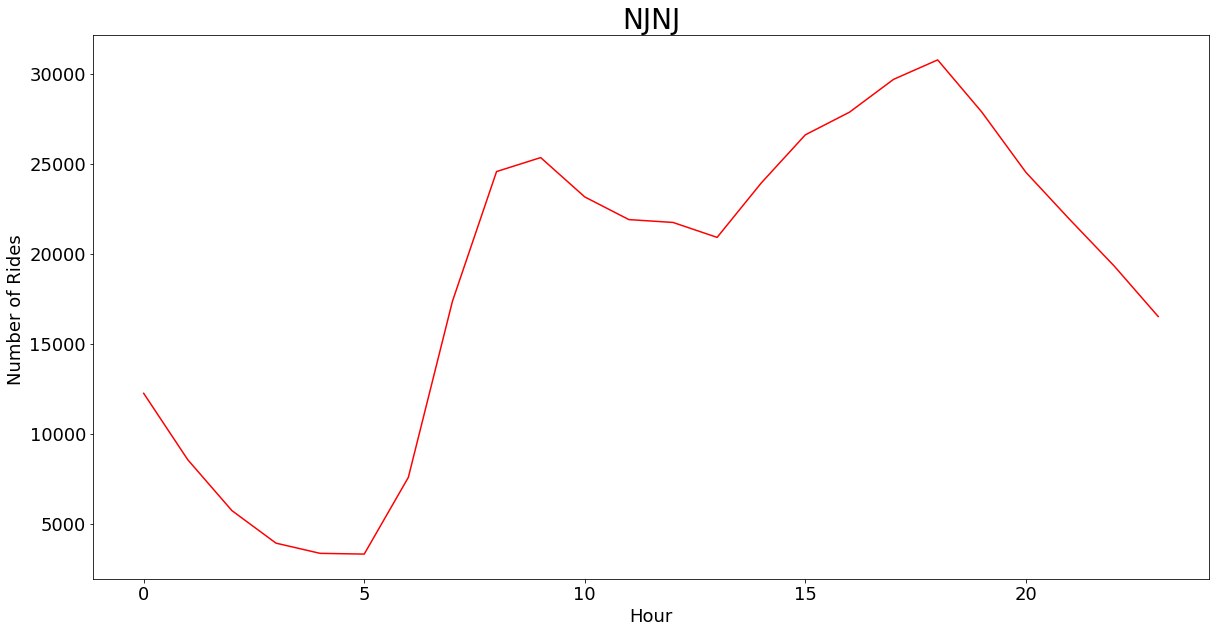

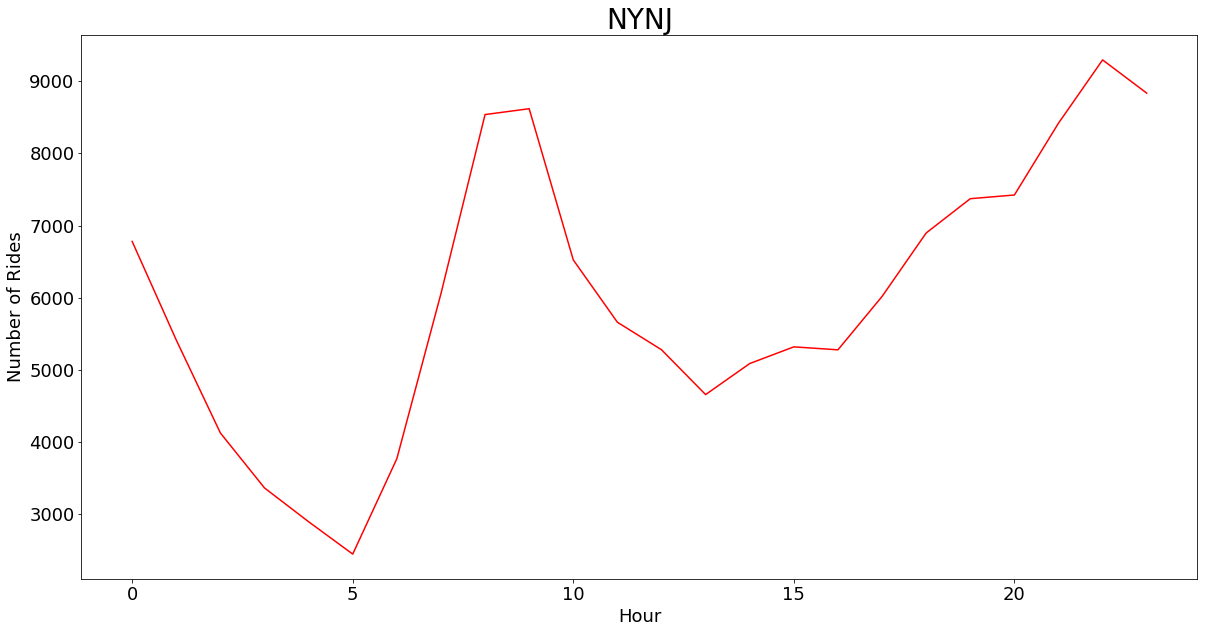

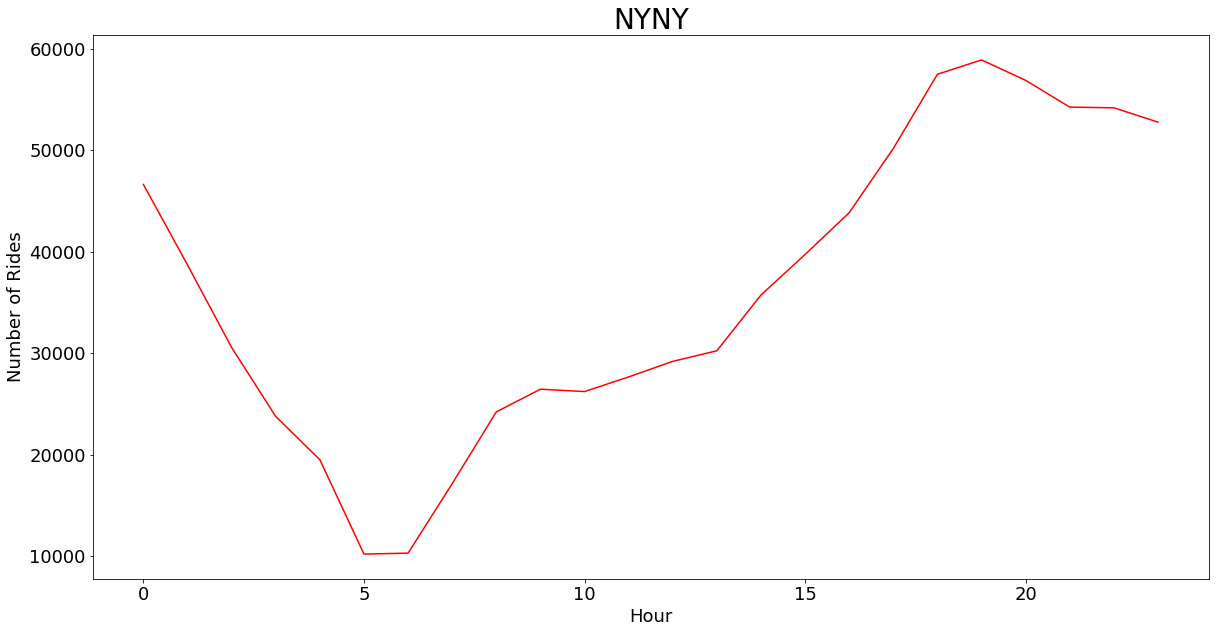

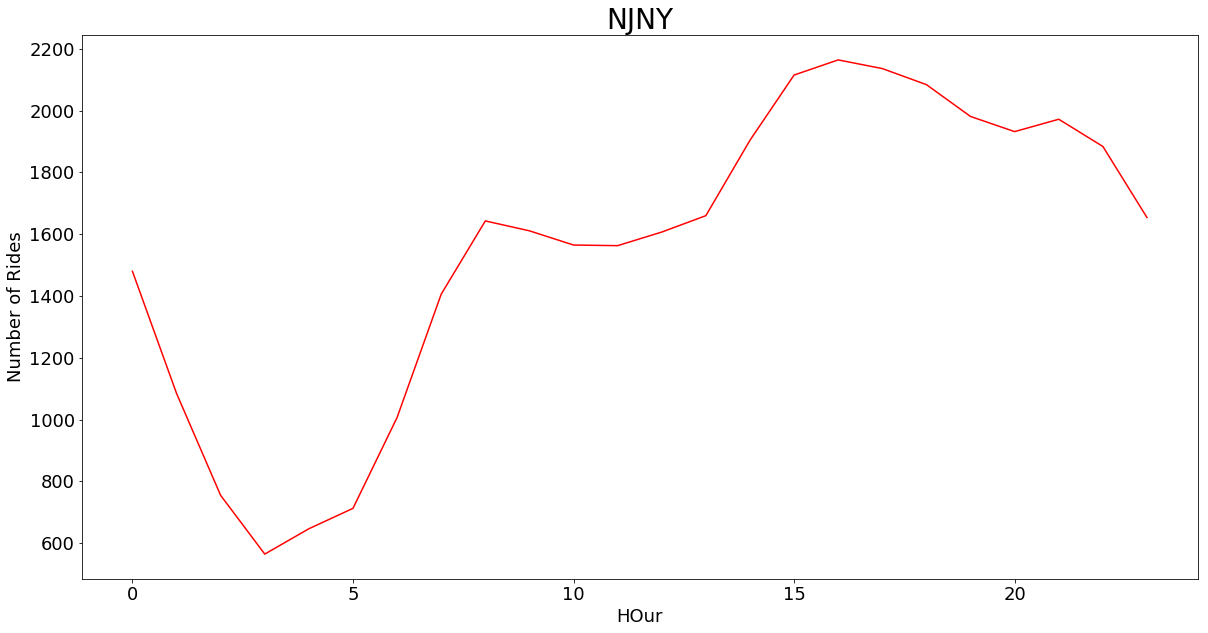

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
#taxi2DF.groupBy('direction','pickupH').count().filter(taxi2DF.direction=='NJNJ').show()
#times=taxi2DF.groupBy('direction','pickupH').count()
#activity=times.toPandas()

activity=activity.sort_values(by = "pickupH")
#fig, ax = plt.subplots()

#colors = {'NYNJ':'red', 'NJNJ':'blue', 'NYNY':'green', 'NJNY':'black'}

#grouped = activity.groupby('direction')
#for key, group in grouped:
 #   group.plot(ax=ax, kind='line', x='pickupH', y='count', label=key, color=colors[key])

#plt.show()

act=activity.loc[activity['direction']=='NJNJ']
act.plot(figsize = (20,10), kind = "line", color = "red",
                               x = "pickupH", y = "count", legend = False)
plt.xlabel("Hour", fontsize = 18)
plt.ylabel("Number of Rides ", fontsize = 18)
plt.title("NJNJ", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

act2=activity.loc[activity['direction']=='NYNJ']
act2.plot(figsize = (20,10), kind = "line", color = "red",
                               x = "pickupH", y = "count", legend = False)
plt.xlabel("Hour", fontsize = 18)
plt.ylabel("Number of Rides", fontsize = 18)
plt.title("NYNJ", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()


act3=activity.loc[activity['direction']=='NYNY']
act3.plot(figsize = (20,10), kind = "line", color = "red",
                               x = "pickupH", y = "count", legend = False)
plt.xlabel("Hour", fontsize = 18)
plt.ylabel("Number of Rides", fontsize = 18)
plt.title("NYNY", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()


act4=activity.loc[activity['direction']=='NJNY']
act4.plot(figsize = (20,10), kind = "line", color = "red",
                               x = "pickupH", y = "count", legend = False)
plt.xlabel("HOur", fontsize = 18)
plt.ylabel("Number of Rides", fontsize = 18)
plt.title("NJNY", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()


In [59]:
taxi2DF.groupBy('direction','pickupH').count().show()


+---------+-------+-----+
|direction|pickupH|count|
+---------+-------+-----+
|     NYNJ|     18| 6898|
|     NJNY|     19| 1981|
|     NYNY|     14|35725|
|     NYNJ|     13| 4660|
|     NYNJ|      1| 5415|
|     NYNY|      6|10280|
|     NJNY|      6| 1007|
|     NYNY|     15|39723|
|     NJNJ|      5| 3351|
|     NJNJ|     15|26618|
|     NJNJ|     14|23945|
|     NJNY|     17| 2136|
|     NJNY|     15| 2115|
|     NJNY|      9| 1611|
|     NJNJ|     11|21914|
|     NYNY|     23|52772|
|     NYNY|     18|57487|
|     NYNY|     17|50170|
|     NJNY|      5|  713|
|     NYNY|      9|26442|
+---------+-------+-----+
only showing top 20 rows

